# MULTICLASS CLASSIFICATION 



In [41]:
#importing libraries
#__Nothing_to_change_here__

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [42]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.fashion_mnist.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_test,Y_test,test_size=0.2)

In [43]:
# Print shape of all 4 variables: X_train,Y_train,X_test, and Y_test

print("Shape of X_train is", X_train.shape)
print("Shape of Y_train is", Y_train.shape)
print("Shape of X_test is", X_test.shape)
print("Shape of Y_test is", Y_test.shape)

Shape of X_train is (8000, 28, 28)
Shape of Y_train is (8000,)
Shape of X_test is (2000, 28, 28)
Shape of Y_test is (2000,)


In [44]:
#print the unique values in Y_train
unique_labels = np.unique(Y_train)
print("Unique values in Y_train are",unique_labels )

Unique values in Y_train are [0 1 2 3 4 5 6 7 8 9]


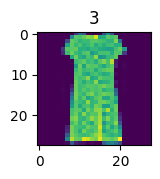

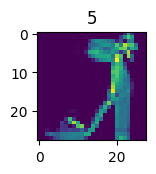

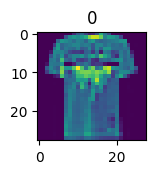

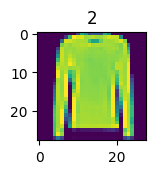

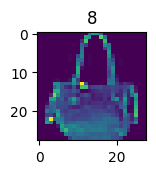

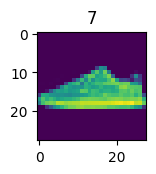

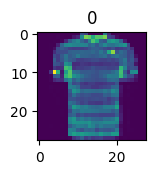

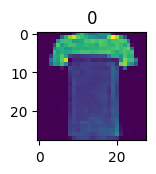

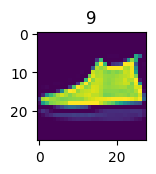

In [45]:
#randomly print 9 images with label
#edit the 2 lines of the code snippet

import random
figure = plt.figure(figsize=(5,5))
for i in range(9):
  index = random.randint(0,len(X_train)-1) # showing the index_th image
  plt.subplot(3,3,i+1)

  plt.imshow(X_train[i])
  plt.title(Y_train[i])
  plt.show()
  #edit1__plot_image_here_
  #edit2__add_label_here_
  
  


###These number denotes the respective object
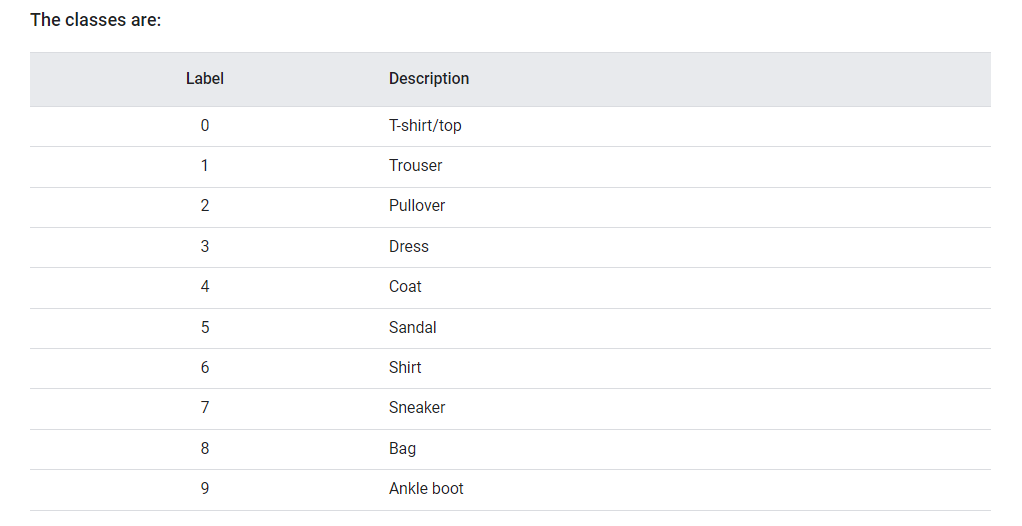

In [46]:
# Find the count of each type of class


unique_values = np.unique(Y_train)
No_of_counts = np.unique(Y_train,return_counts=True)
print("Count of each unique class:", No_of_counts)

Count of each unique class: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([776, 793, 797, 812, 799, 808, 803, 808, 804, 800]))


In [47]:
# model initialization
model = tf.keras.Sequential()

# adding the 1st and 2nd layer layer 
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))




#__add__ additional Intermediate Dense layers here to create the output
model.add(tf.keras.layers.Dense(86, activation = 'relu'))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))




output_layer = model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()


#__output__layer with correct output shape and activation function[ google if finding this difficult to get]


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 86)                11094     
                                                                 
 dense_10 (Dense)            (None, 64)                5568      
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 117,792
Trainable params: 117,792
Non-trainable params: 0
_________________________________________________________________


In [48]:
# Compiling the model
#add the lr and loss in the given space

model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
                  ,metrics=['accuracy'])

In [49]:
#Lets analyse the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 86)                11094     
                                                                 
 dense_10 (Dense)            (None, 64)                5568      
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 117,792
Trainable params: 117,792
Non-trainable params: 0
_________________________________________________________________


###What is the number of trainable parameters in the model?

In [50]:
""" 
[objective] Write the answer here: 
"""

' \n[objective] Write the answer here: \n'

In this model, there are 117792 trainable parameters.

In [51]:
#lets train the model
#pass correct argument at the comment's place

history = model.fit(X_train, Y_train, batch_size=200, epochs=50, validation_split=0.2)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


32/32 [==============================] - 1s 12ms/step - loss: 33.4071 - accuracy: 0.3583 - val_loss: 2.4546 - val_accuracy: 0.4856
Epoch 2/50
32/32 [==============================] - 0s 8ms/step - loss: 1.7937 - accuracy: 0.5691 - val_loss: 1.4629 - val_accuracy: 0.5869
Epoch 3/50
32/32 [==============================] - 0s 8ms/step - loss: 1.3471 - accuracy: 0.6200 - val_loss: 1.4413 - val_accuracy: 0.5906
Epoch 4/50
32/32 [==============================] - 0s 9ms/step - loss: 1.1473 - accuracy: 0.6484 - val_loss: 1.3508 - val_accuracy: 0.6100
Epoch 5/50
32/32 [==============================] - 0s 9ms/step - loss: 1.0490 - accuracy: 0.6589 - val_loss: 1.0991 - val_accuracy: 0.6431
Epoch 6/50
32/32 [==============================] - 0s 7ms/step - loss: 0.9455 - accuracy: 0.6809 - val_loss: 1.3297 - val_accuracy: 0.6300
Epoch 7/50
32/32 [==============================] - 0s 8ms/step - loss: 0.8899 - accuracy: 0.6964 - val_loss: 1.0470 - val_accuracy: 0.6612
Epoch 8/50
32/32 [===========

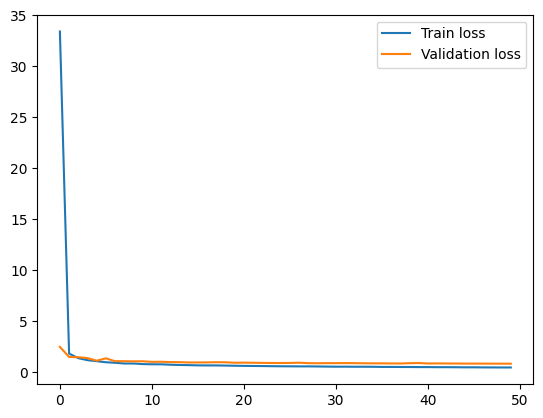

In [52]:
#lets plot the losses

plt.plot(history.history['loss'],label="Train loss")
plt.plot(history.history['val_loss'], label = "Validation loss")
plt.legend()

###What do you infer from the graph of losses above?

In [53]:
"""
[Under 100 words] Write your answer here: 

"""

'\n[Under 100 words] Write your answer here: \n\n'

By looking at the graph and the training data, we can say that the model is slowly learning and both the training and validation losses are decreasing. Also both follow similar trend with incresing or decreasing epoch values. Both the graph eventually converge. We can observe a significant decrease in training loss at first but this is not in the case of validation loss.  


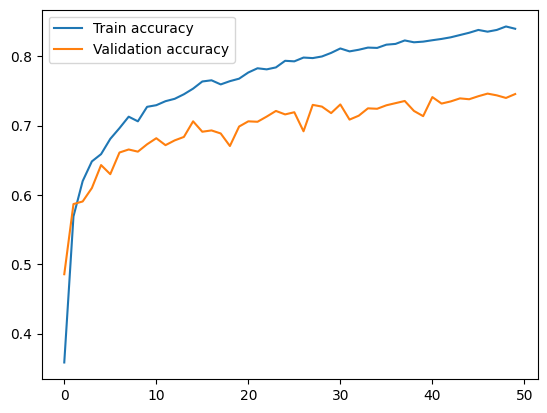

In [54]:
#plotting the accuracy of the traing

plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

###What do you infer from the graph of accuracies above?

In [55]:
"""
[Under 100 words] Write your answer here:

"""

'\n[Under 100 words] Write your answer here:\n\n'

We can observe from the above graph of accuracies that the model has quite good accuracy and perpformance. Both train and validation accuracies are increasing at a high pace with increasing number of iterations. And eventually converge showing no significant changes. It is also a noticable observation that both train and validation accuracies show similar trends with increasing number of epochs or batch size.

In [56]:
#Checking the prediction

Y_predicted = model.predict(X_test)
Ypredicted = np.argmax(Y_predicted, axis=1)
print(Ypredicted.shape)
print(Y_test.shape)

63/63 [==============================] - 0s 2ms/step
(2000,)
(2000,)


In [57]:
# Calculate the R2score for the test data

from sklearn.metrics import r2_score

R2 = r2_score(Y_test, Ypredicted)
print("R2 score:", R2)


R2 score: 0.6407235993156217


In [58]:
# Let's see the kernel(weights) of the layers
model.layers[1].kernel.shape

TensorShape([784, 128])

In [59]:
# print the shape of kernel of other layers as well
print(model.layers[2].kernel.shape)
print(model.layers[3].kernel.shape)

(128, 86)
(86, 64)


In [60]:
# Does that satisfied the matrix multiplication math discussed earlier

Yes, it satisfies the matrix multiplication math as the number of columns of the preceding layer is same as the number of rows of the next succeeding layer. This is what the exact condtion required for a set of matrices to perform matrix multiplication.